CS-333: Applied AI & Machine Learning  
Lab 01: Getting Started with Google Colab + First ML Model  

**Name:** ANEES AHMED  
**Roll No:** ME-1958  
**Section:** VI-ME-B  

Program: BE Mechanical Engineering (VI Semester)  
Instructor: Dr. Abbas Hussain  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


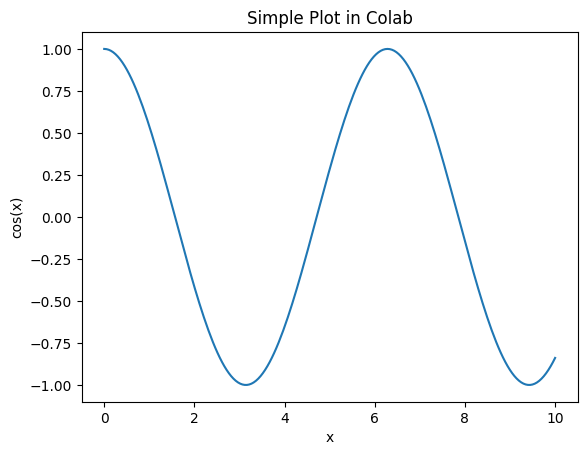

In [3]:
x = np.linspace(0, 10, 200)
y = np.cos(x)

plt.plot(x, y)
plt.title("Simple Plot in Colab")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)


Dataset loaded!
X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']


In [5]:
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
print("Class distribution:")
print(df["target"].value_counts())

print("\nSummary statistics (first 5 features):")
df.describe().iloc[:, :5]


Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Summary statistics (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (455, 30)
Test set: (114, 30)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")


Scaling completed!


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Model trained successfully!


In [10]:
y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual:", y_test[:10])



First 10 predictions: [0 1 0 1 0 1 1 0 0 0]
First 10 actual: [0 1 0 1 0 1 1 0 0 0]


Test Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]


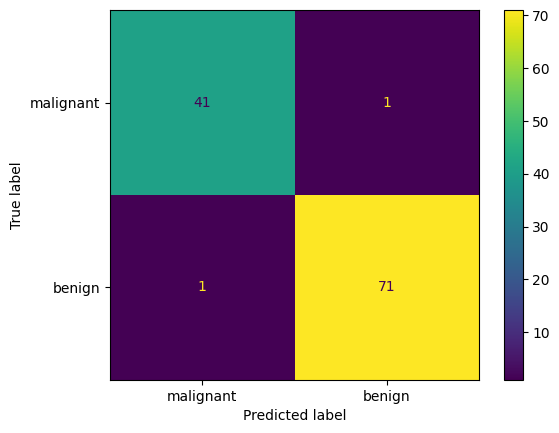

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.grid(False)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression without scaling
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy)


Accuracy without scaling: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaling is important because Logistic Regression is sensitive to feature magnitudes.
Without scaling, features with larger values dominate the model and reduce accuracy.

In [13]:
import torch

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([10.0, 20.0, 30.0])
matrix = torch.tensor([[1.0, 2.0],
                       [3.0, 4.0]])

print("a:", a)
print("b:", b)
print("a + b =", a + b)
print("a * b =", a * b)
print(matrix)


a: tensor([1., 2., 3.])
b: tensor([10., 20., 30.])
a + b = tensor([11., 22., 33.])
a * b = tensor([10., 40., 90.])
tensor([[1., 2.],
        [3., 4.]])


Classification can be used in Mechanical Engineering to predict machine failures,
identify defective components in manufacturing, and classify materials based on
strength or durability using sensor data.